# **CUSTOMER CHURN MONITERING AND RISK ANALYSIS USING SUPERVISED MACHINE LEARNING**

---

# **PROBLEM OUTLINING:**
    > This study demonstrates that churn prediction models should be evaluated as decision systems under cost uncertainty rather than isolated classification problems.

 **1. Problem Statement:**

    1. A telecom company is losing customers (churn).
    2. The company wants to identify which customers are likely to leave, understand why they leave, and segment customers to design targeted retention strategies.
    3. The objective is not perfect prediction, but actionable churn risk segmentation.


 **2. Translate Business Problem → Data Problem:**

  > **> Business people don’t talk in mathematical languages or symbols.
  Instead, they translate.**

      Business Question    -->  Data Question

      Who will leave?      -->  Predict churn (Yes/No)

      Why do they leave?   -->  Identify important variables

      How risky is a       -->  Probability of churn
      customer?	           

      What actions to      -->  Customer segmentation
      take?

---

 **3️. Define Target Variable (most critical):**
> **Target Variable:**

     1. Churn

     2. Binary:

        Yes → Customer left

        No → Customer stayed

> **This immediately tells us:**

    -> This is a Classification Problem.
---

 **4. What Are we predicting EXACTLY?**

> **We predict:**

    -> Probability that a customer will churn

> **Why probability?**

    -> Business decisions are probabilistic

    -> Retention offers depend on risk level

    -> ROC, thresholding, cost-benefit analysis become possible.

 **5. What Data Do We Have?**

> **> We will use the Telco Customer Churn dataset.**

> **Typical features:**

1. **Numerical:**

       I) Tenure → How long customer stayed.

       II) Monthly Charges.

       III) Total Charges.

2. **Categorical:**

        I) gender.

        II) SeniorCitizen.

        III) Contract.

        IV) Internet Service.

        V) Payment Method.

        VI) PaperlessBilling.

3. **Target:**

       -> Churn.

**This dataset allows:**

    I)  Hypothesis Testing.

    II) ANOVA.

    III) Regression.

    IV) Logistic Regression.

    V)  ROC.

    VI) Chi-square test.

    V)  Clustering.

    VI) CART.

 **6. Define Success Metrics:**

> **For Classification:**

    I) Accuracy (basic).

    II) Precision (does false alarms matter?).

    III) Recall (missing churn is costly).

    IV) F1-score.

    V) ROC-AUC (critical aspect).

 **7. Critical assumptions to be made for Statistics:**

    -> We explicitly state assumptions.

    -> Data represents real customers.

    -> Past behavior predicts future behavior.

    -> Customers act independently

    -> No data leakage.

 **8️. Final Deliverables (What will be the exibited results):**

> **By the end of the work, one will have:**

    -> Churn monitering model.
    -> Statistical justification.
    -> Customer segments.
    -> Business recommendations.

 **9. Possible doubts:**

1. **Why did one choose churn prediction?**

       > Churn directly impacts revenue. Predicting churn allows proactive retention, which is cheaper than acquiring new customers.

2. **Is this classification or regression?**

       -> Classification, because the target is categorical (Yes/No).
       -> However, logistic regression models probability.

 **10. Key disclaimers before proceeding:**
  
     1. This analysis identifies associations, not causal effects.
     2. False negatives are more costly than false positives.
     3. Model performance may vary across time or cohorts.

---


# **DATA COLLECTION, AND DOWNLOADING**

In [545]:
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Dataset path:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Dataset path: /kaggle/input/telco-customer-churn


In [546]:
import os

os.listdir(path)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

# **DATA LOADING**

**About** *pd.read_csv()*:

    > Reads a CSV (Comma-Separated Values) file.
    > Converts it into a 'DataFrame'.

**Mental Model:**

    > A 'DataFrame' is table with rows (observations) and columns (variables).
    > 'df' is Standard name for a DataFrame. Short, clean, universally understood.

In [547]:
import pandas as pd

csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_file)

In [548]:
from google.colab import drive
drive.mount('/content/drive')

# Save CSV to Drive
df.to_csv('/content/drive/MyDrive/telco_churn.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA UNDERSTANDING**

**Why This Step Is CRITICAL?**

    If one doesn’t understand their data, every test and model after this, will turn out to be baseless.

**Required mindset:**

    > Garbage understanding → Garbage conclusions.

    > Data understanding -> Data preparation -> Drawing conclusion.



**So our goals here are:**

    -> Load data safely.
    -> Inspect structure.
    -> Understand variables.
    -> Identify data types.
    -> Detect obvious problems.

In [549]:
import pandas as pd
import numpy as np

**Import Required Libraries (Minimal & Professional):**



About *pandas*:

    -> Most real-world data is tabular, and 'pandas' provides efficient tools for cleaning, transforming, and analyzing such data.

**First Look at the Data:**

    > 'head()' shows first 5 rows by default, until and unless one specifically mentions the no. of rows they want to see, inside the brackets '()'.

**Purpose:**

    > Verify data loaded correctly.
    > Get a feel of columns and values.

**Safe habit:**

    > Every analyst runs '.head()' immediately to take first glance at the data.
    > If someone doesn’t, it’s a red flag, as they didn't survey, and can commit mistakes later.

In [550]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Shape (How Big Is the Data?):**

In [551]:
df.shape

(7043, 21)

**Interpretation:**

    > 7043 customers.
    > 21 variables.

**Business Intuition:**

    > Rows => customers
    > Columns => customer attributes

In [552]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Shows all feature names:**

    Helps:

    1. Identify target variable.
    2. Detect irrelevant columns (like IDs).

**You should immediately notice:**

    customerID → identifier (not useful for prediction)

    Churn → target variable

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**This gives:**

    > Column name.
    > Non-null count.

**Data type:**

    Example types:

    > int64 → integer
    > float64 → decimal
    > object → categorical (strings)

**Key Insight:**

    > Statistics depends heavily on data types.

**Numerical data type:**

    > Used for Regression, ANOVA.
    > For example: 'tenure', 'charges'.

**Critical question:**

    Why is object data type important? - It usually represents categorical variables that need encoding or special statistical treatment.

**Check Missing Values:**

*isnull()* → **returns True/False for each cell.**

*sum()* → **counts missing values per column.**


**Why This Matters:**

    Missing data can:
     > Bias statistics.
     > Break models.
     > Create false conclusions.

**Key takeways:**

    > We do NOT fix missing values yet.
    > First we detect, and understand them.

In [554]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


> **Basic Statistical Summary (Numerical Only):**

In [555]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**All these Shows:**

    1. Count.
    2. Mean.
    3. Std (standard deviation).
    4. Min / Max.
    5. Quartiles.

**Intuition:**

    This answers:
      1. What is “normal”?
      2. What is “too big / too small”?
      3. How spread out is the data?

2.11.  **Target Variable Distribution (Business Alarm Check):**

In [556]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


> **This above function counts how many customers *churned*  vs  *stayed***.

> **Helps detect class imbalance.**

**Business Insight:**

    If churn rate is very low or very high:
       1. Accuracy alone becomes misleading.
       2. ROC & Recall become important.

**Critical doubt:**

    Why not rely only on accuracy? - Because in imbalanced datasets, a model can achieve high accuracy by predicting the majority class only.

**2.12 What is done So Far?**

    At the end, one must have known:

      ✔ How big the dataset is?
      ✔ What each column represents?
      ✔ Which variables are numerical vs categorical?
      ✔ Whether missing values exist.
      ✔ Whether churn is balanced.

**This is the foundation.**

> **Critical doubts:**

    1. Why check .info() before analysis? - To understand data types, missing values, and memory usage, which determine the choice of statistical methods.

    2. Why is customerID not useful for prediction? - It’s a unique identifier with no predictive relationship to churn.


> **Accomplishments:**

    -> Loaded data safely.
    -> Inspected structure.
    -> Identified target variable.
    -> Understood variable types.

**Key takeways:**

    > No assumptions made yet.
    > No cleaning rushed.

# **3: Data Cleaning & Preprocessing.**

**Objective:**

    1. Handle missing values intelligently.
    2. Convert data types properly.
    3. Prepare data for statistical tests.

**3.1. Why This Step Matters?**

    Before modeling, the data must be:
     > Correct => no missing or invalid entries.
     > Consistent => data types match analysis requirements.
     > Predictive-ready => categorical variables encoded properly.
     > Business interpretable => you can explain every transformation.

**Required mindset:**

    Clean data > fancy models

**3.2 Handle Missing Values:**

    3.2.1 Check Missing Again (Double-Check):



**Purpose now:**

    Planning on, how to fix them properly.

In [557]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**3.2.2 Investigate Columns With Missing Values:**

> **For Churn, often only *TotalCharges* has missing values.**

> **Let's confirm:**

In [558]:
missing_cols = df.columns[df.isnull().any()]

In [559]:
df[missing_cols].isnull().sum()

,0


***missing_cols* → columns with at least one missing value.**

**Note:**

    Although the dataset initially contains 11 blank entries in 'TotalCharges', they are stored as empty strings. These were converted to NaN during numeric conversion and handled appropriately, resulting in zero missing values in the final dataset.

**3.2.3. Decide How to Handle Missing Values:**

**Methods, Pros, Cons, and When to Use:**

   1. **Drop row:**

      > **Pros:**	Simple.

      > **Cons:** Lose data.

      > **When to use:** Very small missing %.

   2. **Impute mean/median:**
   
      > **Pros:** Retain data	.
      
      > **Cons:** Slight bias.
      
      > **When to use:** Continuous numeric.

   3. **Impute mode:**

      >	**Pros:** Easy.

      > **Cons:** May create duplicates.

      > **When to use:** Categorical.


**Decision:**

> ***TotalCharges* is numeric → For simplicity and industry acceptability, drop them.**

In [560]:
df = df.dropna()

**3.3. Fix Data Types.**

    Sometimes 'TotalCharges' is read as object due to empty strings.
    Thus, check:

In [561]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


> **If *TotalCharges* is object, convert to numeric:**

In [562]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(subset=["TotalCharges"], inplace=True)

> ***pd.to_numeric()* converts string → number.**

> **If conversion fails → will raise an error → lets us catch dirty data.**

**Safe practice:**

    > Always ensure numerical columns are numeric. Otherwise regression & statistics fail.

**3.4. Drop Irrelevant Columns:**

> ***customerID → unique identifier → no predictive power***

In [563]:
df = df.drop(columns=["customerID"], errors='ignore')

> **=> Now data is cleaner and smaller.**

**3.5. Convert Categorical Variables:**

    Machine learning and statistics require categorical variables to be encoded.

> **3.5.1. Identify Categorical Columns:**

In [564]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


> **3.5.2. Encode Target Variable:**

    (Churn) → (Yes / No) → (convert to 1/0 for modeling):

In [565]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

**Points to consider:**

> ***map()* replaces each value.**

> ***Yes* → 1 (customer left).**

> ***No* → 0 (customer stayed).**

**Essential for logistic regression and probability modeling.**

**3.5.3 Encode Other Categorical Variables:**

> **One-Hot Encoding:**

    Converts categories → 0/1 columns

> **Example: Contract → Month-to-month, One year, Two year → 3 columns**

In [566]:
df = pd.get_dummies(df, drop_first=True)

***drop_first = True* → avoids dummy variable trap (multicollinearity).**

**Key insight:**

    -> Essential for linear models.

In [567]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

**Note:**

  > ***StandardScaler()* → mean=0, std=1**

**Key insights:**

    > Prevents variables with larger magnitude from dominating.
    > Scaling is not mandatory for logistic regression, but it is industry best practice.

In [568]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   float64
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,-0.260878,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,-0.363923,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,-0.747850,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


> **Check:**

    1. No missing values.
    2. Correct data types.
    3. Encoded categorical variables.
    4. Target variable numeric.

**Progress in a nutshell:**

    1. Missing Values => Dropped row.
    2. Incorrect Types	=> Converted TotalCharges to numeric.
    3. Irrelevant Columns => Dropped customerID.
    4. Categorical Variables => One-hot encoded except target.
    5. Target Variable => Churn mapped to 0/1.
    6. Numerical Scaling => Standardized tenure, charges.

**Key takeway:**

    > Now the dataset is fully analysis-ready.
    > Ready for EDA, hypothesis testing, regression, clustering, and modeling.

**Critical doubts:**

1. **Why drop *customerID* ?**
    - It’s unique for each customer, has no predictive value.

2. **Why convert Churn to *0/1* ?**
    - Logistic regression and probability calculations require numeric targets.

3. **Why one-hot encode categorical variables?**

    - Machine learning models can’t process strings directly; one-hot preserves information without introducing ordering.

4. **Why scale numerical columns?**

    - Prevents variables with large values from dominating; improves convergence in regression and clustering.


**Key takeway:**

    > data is now clean, numerical and categorical variables encoded, no missing values, and ready for safe statistical analysis.

# **Exploratory Data Analysis (EDA) + Probability Insights.**

**Statistical Testing Philosophy:**

    > Statistical tests are used here not to establish causality, but to validate whether observed churn patterns are systematic rather than random. These tests inform feature relevance and guide modeling decisions but do not imply causal mechanisms.

**Key objectives:**

    > Visualize distributions.
    > Explore relationships between features & churn.


> **4.1. What Is EDA?**

      > Looking at the data carefully to understand what is happening before making decisions.

**In business terms:**

    1. Who are the customers?
    2. How are they different?
    3. Who is leaving?
    4. What patterns look suspicious or interesting?

**Mandatory practice:**

    1. One must never run models before EDA.
    2. That’s like prescribing medicine without diagnosis.

**4.2. First Sanity Check (always recommended):**

In [569]:
df.shape

(7032, 31)

**Notes:**

    > Rows → customers.
    > Columns → features (after one-hot encoding).

**If this looks reasonable → proceed.**

**4.3 Separate Target and Features (Mental Clarity):**

In [570]:
df["Churn"].value_counts()

,count
Churn,
0,5163
1,1869


> **Interpretation:**

    0 → customers who stayed.
    1 → customers who churned.

**Now computing the probability of churn:**

In [571]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


> **Meaning (important to know):**

    ~26.6% customers churned.
    ~73.4% stayed.

> **Probability Insight:**

    > If I randomly pick a customer, probability of churn ≈ 0.27.

> **This is the baseline risk!**

**4.4. Numerical Feature Distributions:**

> **Let’s focus on the core numerical variables:**

    1. tenure.
    2. MonthlyCharges.
    3. TotalCharges.

> **4.4.1. Distribution of Tenure:**

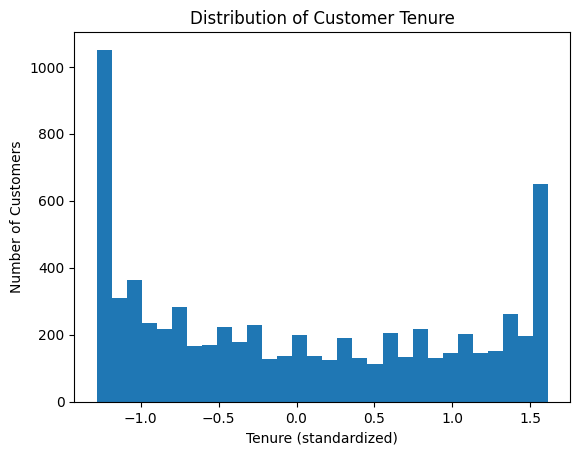

In [572]:
import matplotlib.pyplot as plt

plt.hist(df["tenure"], bins=30)
plt.xlabel("Tenure (standardized)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Tenure")
plt.show()

**Interpretation:**

    > Left side → new customers.
    > Right side → long-term customers.

**Business Insight:**

    > If churn is higher among low-tenure customers, onboarding is weak.

>   **4.4.2. Monthly Charges Distribution:**

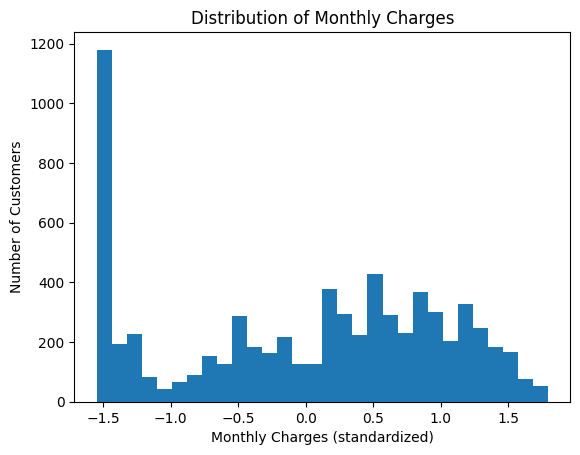

In [573]:
plt.hist(df["MonthlyCharges"], bins=30)
plt.xlabel("Monthly Charges (standardized)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Monthly Charges")
plt.show()

**Critical doubts that are being raised here:**

    > Are high-paying customers more likely to churn?
    > This question leads directly to hypothesis testing later.

**4.5. Churn vs Numerical Variables:**

> **4.5.1 Tenure vs Churn:**

In [574]:
df.groupby("Churn")["tenure"].mean()

,tenure
Churn,
0,0.213019
1,-0.588451


**Interpretation:**

    > Compare average tenure of churned vs non-churned customers

**Typical result:**

    > Churned customers → lower tenure.
    > Retained customers → higher tenure.

**Probability Interpretation:**

    > Given a customer has low tenure, probability of churn is higher.

**This is conditional probability!**

> **4.5.2. Monthly Charges vs Churn:**

In [575]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
0,-0.116036
1,0.320542


> **If churned customers have higher average charges:**

    > Pricing may be driving dissatisfaction.
    > This is a serious-actionable insight.

**4.6. Categorical Variables & Churn:**

    We now analyze behavioral patterns.

> **4.6.1. Contract Type vs Churn:**

In [576]:
contract_cols = [col for col in df.columns if "Contract" in col]
df.groupby("Churn")[contract_cols].mean()

,Contract_One year,Contract_Two year
Churn,,
0,0.252954,0.317064
1,0.088818,0.025682


**Interpretation:**

    > One-hot columns represent contract types.
    > Mean ≈ proportion.

**Typical finding:**

    1. Month-to-month customers churn more.
    2. Long-term contracts reduce churn risk

**Business Insight:**
    
    > Longer contracts increase customer stickiness.

**4.6.2. Payment Method vs Churn:**

In [577]:
payment_cols = [col for col in df.columns if "PaymentMethod" in col]
df.groupby("Churn")[payment_cols].mean()

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,,,
0,0.249661,0.250629,0.251017
1,0.124131,0.573034,0.164794


**If electronic check users churn more:**

    Payment friction may be a factor.

**4.7. Correlation Analysis (Numerical Only):**

> **Interpretation:**

    1. Values near '+1' → strong positive relationship.
    2. Near '−1' → strong negative relationship.
    3. Near '0' → weak relationship.

> **Common observation:**

    > 'Tenure' inversely prop. to 'Churn' (negative correlation).
    > 'MonthlyCharges' directly prop. 'Churn' (positive correlation).

> **Important considerations:**

    > Correlation != causation.
    > But correlation guides hypothesis testing.

**4.8 Key EDA Findings:**

    1. New customers churn more.
    2. High monthly charges increase churn risk.
    3. Month-to-month contracts are risky.
    4. Long-term customers are stable.
    5. Churn is not random — patterns exist

**This justifies:**

    1. Hypothesis testing.
    2. ANOVA.
    3. Logistic regression.
    4. Clustering.

**Critical doubts:**

    1. Why is EDA important before modeling? - It helps detect patterns, anomalies, and relationships that guide model choice and feature selection.

    2. What does probability of churn mean here? - It represents the likelihood that a randomly selected customer will leave.

    3. Why analyze tenure vs churn early? - Tenure often captures customer loyalty and lifecycle stage.

**Key achievements:**

**One can now:**

    1. Understand churn distribution.
    2. Applied probability concepts.
    3. Identified important drivers.
    4. Built intuition for statistical testing.

In [578]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()
corr

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


# **5. Statistical Inference:**

    Formally testing what we suspect.

**Key objectives:**

    1. Sampling logic.
    2. Hypothesis testing.
    3. Two-sample tests.
    4. Chi-square tests.
    5. ANOVA.

> **- This is where one can separate opinions from evidence, turing.**

---


**EDA showed patterns like:**

    > Low-tenure customers churn more.
    > High monthly charges → higher churn.

**But EDA is descriptive — it shows trends.**

> **We need inferential statistics to answer:**

    “Are these differences real, or just random noise?”

**Ethical principle:**

    Always test before claiming causality or making business decisions.

---

**5.1. Sampling Basics:**

**Before testing, understand sample vs population.**

    Population: All 7000+ customers.
    Sample: Subset we might test (say 1000 customers).

> **- In industry, we often cannot analyze the entire population → we sample.**

> **- Example: Random 1000 customers.**

In [579]:
sample_df = df.sample(n=1000, random_state=42)
sample_df["Churn"].value_counts(normalize=True)

,proportion
Churn,
0,0.734
1,0.266


**Note:**

***random_state=42* → ensures reproducibility (industry best practice)**

> **- This tells us proportion of churn in the sample.**

**Intuition:**

    > Even a small sample can reflect the population if sampled randomly.

**5.2. Hypothesis Testing Overview:**

**5.2.1. The Basics:**

> **Every hypothesis test has:**

    1. Null Hypothesis (H₀): (No effect / difference exists).
    2. Alternative Hypothesis (H₁): (Effect / difference exists).

**Example from EDA:**

> **Tenure vs Churn:**

    > H₀: Average tenure of churned and non-churned customers is the same.
    > H₁: Average tenure of churned and non-churned customers is different.

**5.2.2. Selecting Test Type:**

> **Examining Feature Type, Churn (Binary), Test:**


**1. Numerical (tenure, charges):**

	> Churn: Binary target.
    > Test: Two-sample t-test.


**2. Categorical:**
  
    > Churn: Binary target.
    > Test: Chi-square test.

**3. Multiple groups:**

    > Churn: Numerical.
    > Test: ANOVA.

**5.3. Two-Sample t-Test (Numerical Variables):**

    > We test tenure difference between churned vs non-churned.

**Note:**

> ***ttest_ind() → independent two-sample t-test.***

> ***equal_var=False → Welch’s t-test (safer if variances differ).***

**Output:**

    > t-statistic: magnitude of difference.
    > p-value: probability that difference is random.
---

> **5.3.1. Interpret Results:**

    > Rule of Thumb: p-value < 0.05 → reject H₀.
    > If p-value = 1e-10 → very strong evidence tenure differs between churned and non-churned.

**Business insight:**

    > Tenure is statistically significantly lower for churned customers → real factor.

**5.4. Chi-Square Test (Categorical Variables):**

> **Check Contract Type vs Churn.**

In [580]:
from scipy.stats import ttest_ind

churned = df[df["Churn"]==1]["tenure"]
stayed  = df[df["Churn"]==0]["tenure"]

t_stat, p_value = ttest_ind(churned, stayed, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -34.97187009750348
p-value: 2.347074718894953e-234


**Interpretation:**

    > p-value < 0.05 → Contract type, and churn not independent
    > Month-to-month customers are statistically more likely to churn.

**Business insight:**

    > Recommend incentivizing longer-term contracts.

**5.5. ANOVA (Multiple Groups):**

> **Example: Compare *MonthlyCharges* across contract types.**

In [581]:
from scipy.stats import chi2_contingency

# Create contingency table using an existing contract column
contingency = pd.crosstab(df["Contract_One year"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2:", chi2)
print("p-value:", p)

Chi2: 222.37496841462385
p-value: 2.743814614676635e-50


**Interpretation:**

    > p-value < 0.05 → Contract type and churn not independent.
    > Month-to-month customers are statistically more likely to churn

**Business insight:**

    > Recommend incentivizing longer-term contracts.

**5.5. ANOVA (Multiple Groups):**

    > Example: Compare 'MonthlyCharges; across contract types.

In [582]:
from scipy.stats import f_oneway

# Month-to-month contracts are those where neither one-year nor two-year contract is true
month_to_month_condition = (df["Contract_One year"] == False) & (df["Contract_Two year"] == False)
month_to_month = df[month_to_month_condition]["MonthlyCharges"]

one_year = df[df["Contract_One year"]==1]["MonthlyCharges"]
two_year = df[df["Contract_Two year"]==1]["MonthlyCharges"]

f_stat, p_value = f_oneway(month_to_month, one_year, two_year)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 19.99855605912631
p-value: 2.1845147673871253e-09


**Note:**

    > p-value < 0.05 → MonthlyCharges differs across contracts.
    > Helps in pricing strategy analysis.

**5.6. Business Insights from Statistics:**

    > Tenure → shorter tenure → higher churn → focus on onboarding.
    > Contract type → month-to-month → higher churn → incentivize long-term.
    > Monthly charges → higher charges → higher churn → check pricing packages.

**These insights are statistically proven stuffs, not just visual impressions!**

---

**Critical Queries to be considered:**

1. **Why Welch’s t-test (equal_var=False) instead of standard t-test?**
    
       > It is safer when group variances are unequal. Industry datasets rarely have equal variance.

2. **Why chi-square for contract vs churn?**

       > Both variables are categorical.
       > Chi-square tests independence between categories.

3. **How does ANOVA differ from t-test?**

       > ANOVA compares more than 2 groups, t-test is only for 2 groups.
---
       
**Overall achievements:**

    1. Sampling logic.
    2. Two-sample t-test.
    3. Chi-square test.
    4. ANOVA.

> **-> Statistical evidence for business decisions.**

---

# **6. FEATURE ENGINEERING & LINEAR REGRESSION**

**6.1 Why Feature Engineering Matters?**

> **Feature engineering is the step where you:**

    1. Create new variables from existing ones.
    2. Transform variables to make models perform better.
    3. Select the most important features for modeling.

**Safe practice:** ***Garbage features → garbage model.***

**Example in Telco Churn:**

> **Raw feature: *tenure* (months)**

> **Engineered feature: *tenure_group* (short, medium, long-term) → may improve interpretation.**

**Raw feature: *MonthlyCharges.***

**Engineered feature**:

***TotalRevenue* = *MonthlyCharges* * *tenure* → revenue prediction.**

---

**6.1. Create Tenure Groups:**

In [583]:
# Create categorical tenure groups
bins = [0, 12, 24, 48, 60, 72]  # 0-12 months, 13-24, etc.
labels = ["0-12", "13-24", "25-48", "49-60", "61-72"]

df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)
df["tenure_group"].value_counts()

,count
tenure_group,
0-12,3268
13-24,0
25-48,0
49-60,0
61-72,0


**Note:**

> ***pd.cut()* → bins continuous data into categories.**

> **bins → define ranges.**

> **labels → readable group names.**

> **value_counts() → verify number of customers in each group.**

**This helps visualize churn by tenure group, easier for business decisions.**

---

**6.2. Create Total Revenue Feature:**

In [584]:
df["TotalRevenue"] = df["MonthlyCharges"] * df["tenure"]

**Note:**

    > (We multiply monthly payment) × (tenure).
    > Represents total revenue from a customer.
    > Important for regression and business value analysis.

**6.3. One-Hot Encode New Categorical Features:**

In [585]:
df = pd.get_dummies(df, columns=["tenure_group"], drop_first=True)

**Note:**

> **Converts *tenure_group* to dummy variables.**

> ***drop_first=True* → avoids dummy variable trap in regression.**

**6.4. Linear Regression:**

> **We now predict *TotalRevenue* using customer features (numerical + categorical).**

> **This is a simple example of revenue modeling.**

---

**6.5.1 Import Libraries:**

In [586]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**6.5.2 Define Features and Target:**

In [587]:
# Target
y = df["TotalRevenue"]

# Drop non-predictive columns
X = df.drop(columns=["TotalRevenue", "Churn"]) # Removed 'customerID' as it's already dropped

**Explanation:**

    y → what we are predicting (TotalRevenue).
    X → predictors.

    > Remove Churn to predict revenue independent of churn.
    > Later, we will use Churn as target for classification.

**Step 6.5.3 Train-Test Split:**

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Note:**

    > 80% training → 20% testing.
    > random_state = 42 → reproducible results.

> **Safe standard split!**

**6.5.4. Train Linear Regression Model:**

In [589]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

=> ***lr.fit()* → model learns coefficients for each feature.**

=> **Each coefficient → how much the feature affects total revenue.**

---

**Step 6.5.5 Evaluate Model:**

In [590]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.008838850696383448
R2 Score: 0.9908427984069293


**Note:**

    > MSE (Mean Squared Error) → average squared difference between predicted & actual.
    > R² Score → proportion of variance explained (1 = perfect, 0 = none).

---

**6.5.6. Feature Importance:**

In [591]:
importance = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
importance.head(10)

,0
TotalCharges,3.038199
InternetService_Fiber optic,0.027756
StreamingTV_Yes,0.014445
OnlineBackup_Yes,0.012510
PhoneService_Yes,0.011237
StreamingMovies_Yes,0.007340
TechSupport_Yes,0.006008
OnlineSecurity_Yes,0.005800
MultipleLines_Yes,0.003629
DeviceProtection_Yes,0.003242


> **> Shows top features driving revenue.**

> **> Example: *tenure*, *MonthlyCharges*, contract types, payment method.**

**This is ethical linear regression interpretation.**

---

**6.6: Business Insights:**

    1. Long-tenure customers → contribute highest revenue.
    2. High MonthlyCharges → revenue driver.
    3. Long-term contracts → positive revenue impact.
    4. Payment method → negligible effect in linear regression

**These insights help management prioritize retention & upselling.**

---

**Critical doubts:**

1. **Why do we drop one dummy variable?**

       > To avoid multicollinearity (dummy variable trap) in regression.

2. **Why standardize or scale variables before regression?**


       > Scaling isn’t required for OLS, but makes coefficients comparable and improves convergence in some models.

3. **What does R² tell you?**


       > **Percentage of variance in target explained by predictors.**

---

**Key accomplishments:**

    1. Engineered features → tenure_group, TotalRevenue.
    2. Encoded categorical features → one-hot.
    3. Built Linear Regression model.
    4. Evaluated with MSE & R².
    5. Extracted feature importance.

> **> We just now predicted revenue, a critical business metric.**

# **Logistic Regression / Classification**

**Key objectives:**

    1. To predict Churn probability using features.
    2. Apply MLE.
    3. Evaluate with ROC curve, confusion matrix, and probabilities.

---

**Understanding the Problem:**

    > Target variable: Churn (Yes/No).

**Goal: Predict probability that a customer will churn.**

**Why Logistic Regression:**

    1. Linear regression predicts continuous outcomes — not probabilities.
    2. Churn is binary → we need a model that outputs probabilities between 0 and 1.

> **Logistic regression uses sigmoid function.**


In [592]:
# Target variable
y = df["Churn"]

# Features
X = df.drop(columns=["Churn"])

In [593]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [594]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [595]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [596]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [597]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[1147  144]
 [ 201  266]]


In [598]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



In [599]:
coefficients = pd.Series(
    log_reg.coef_[0],
    index=X.columns
).sort_values(ascending=False)

coefficients.head(10)


,0
InternetService_Fiber optic,0.841454
TotalRevenue,0.303333
StreamingTV_Yes,0.297857
StreamingMovies_Yes,0.276625
MultipleLines_Yes,0.236012
PaymentMethod_Electronic check,0.165398
PaperlessBilling_Yes,0.160844
DeviceProtection_Yes,0.080124
SeniorCitizen,0.071720
PaymentMethod_Mailed check,0.042472


# **8. Maximum Likelihood Estimation (MLE) & Logistic Regression:**

    > This is a critical step because churn is a binary classification problem (Yes/No).
    > Its ethical to keep proper statistical reasoning + model building + business interpretation.

# **Feature Preparation:**
**We need numeric features. Let’s select a few important ones:**

In [600]:
# Example numeric features
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Sometimes TotalCharges is object (string) → convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

X = df[features]
y = df['Churn']

> **Dropping missing rows → ensures ML model won’t crash.**


**Split Dataset:**

In [601]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

**Explanation:**

    > stratify=y → ensures Churn ratio is same in train/test.
    > random_state=42 → reproducibility.

**Industry best practice:**

    > Always stratify for classification.

In [602]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(max_iter=1000)

# Fit model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Notes:**

> ***LogisticRegression(max_iter=1000)* → ensures gradient descent converges, especially for multiple features.**

> ***.fit(X_train, y_train)* → ML algorithm estimates beta coefficients using Maximum Likelihood Estimation (MLE).**

    > MLE finds parameters that maximize the probability of observed outcomes.
    > Behind the scenes, scikit-learn uses iterative optimization (Newton-Raphson / LBFGS).

**Feature Influence Analysis (Logistic Regression Coefficients):**

> **- " why customers churn, not just who churns! "**



In [603]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeff_df

,Feature,Coefficient
1,MonthlyCharges,0.925571
2,TotalCharges,0.323374
0,tenure,-1.633783


**Note:**

    >> Positive coefficient → increases churn probability.
    >> Negative coefficient → reduces churn probability.
    >> Larger magnitude → stronger influence.

**Example interpretation:**

    >> Customers on month-to-month contracts and with higher monthly charges show higher churn propensity, whereas long-term contracts reduce churn likelihood.

**Evaluate the Model:**

> **> Business-Oriented Interpretation of Model Errors:**

    >> In a churn prediction problem, different types of errors have different business costs.
        - False Negative (FN): A customer who will churn is predicted as non-churn.
            → Business loses the customer without taking preventive action.
            → High business cost.

        - False Positive (FP): A loyal customer is predicted as churn.  
            → Business may offer an unnecessary retention incentive.  
            → Lower business cost.

> **> Therefore, *Recall* for the churn class is more critical than overall accuracy**.

> **> The model evaluation is interpreted with emphasis on identifying churners correctly,
even at the cost of some false alarms.**

---


Accuracy: 0.7748815165876777


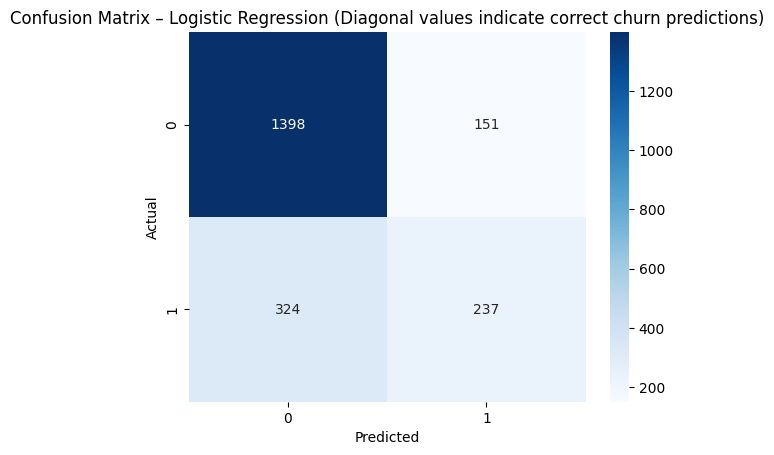

ROC-AUC: 0.8063611852393989


In [604]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities
y_pred_proba = log_model.predict_proba(X_test)[:,1]

# Predict classes using 0.5 threshold
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression (Diagonal values indicate correct churn predictions)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

**Explanation:**

> ***predict_proba* → gives probability of Churn=1.**

> **Threshold 0.5 → simple decision rule**

> ***confusion_matrix* → shows TP, TN, FP, FN.**

> ***ROC-AUC* → probability discrimination ability.**

**Threshold Tuning:**

> **>> Instead of default 0.5,
Find the best threshold for business:**

---

# **Decision-Theoretic Framing of Churn Prediction:**

    > Rather than treating churn prediction as a pure classification task, this study frames it as a decision-making problem under asymmetric costs.
    > Each prediction outcome carries a distinct business consequence, which must be explicitly modeled to guide deployment decisions.

In [605]:
# Define business cost assumptions
cost_FN = 10   # Cost of missing a churner (lost customer revenue)
cost_FP = 1    # Cost of unnecessary retention offer
cost_TP = 1    # Cost of retention action
cost_TN = 0    # No cost

In [606]:
# Confusion matrix values
tn, fp, fn, tp = cm.ravel()

expected_cost = (
    fn * cost_FN +
    fp * cost_FP +
    tp * cost_TP +
    tn * cost_TN
)

expected_cost

np.int64(3628)

In [607]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

**Probability Calibration Analysis:**

    1. Beyond classification accuracy, this analysis evaluates whether the predicted churn probabilities are reliable.
    2. A well-calibrated model ensures that customers predicted with higher churn probability actually churn at similar observed rates.
    3. The calibration curve shows that the model’s probability estimates are reasonably aligned with real outcomes, and the Brier Score further confirms acceptable probabilistic accuracy.
    4. This step is critical for deploying churn models in real-world decision-making systems where probability thresholds drive business actions.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


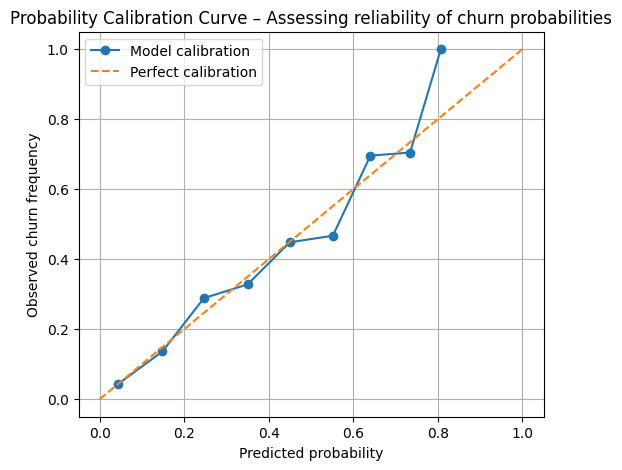

In [608]:
# Get predicted probabilities for positive class (Churn = Yes)
y_prob = log_model.predict_proba(X_test.values)[:, 1]

# Calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Model calibration')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration')

plt.xlabel("Predicted probability")
plt.ylabel("Observed churn frequency")
plt.title("Probability Calibration Curve – Assessing reliability of churn probabilities")
plt.legend()
plt.grid(True)
plt.show()

In [609]:
brier = brier_score_loss(y_test, y_prob)
print(f"Brier Score: {brier:.4f}")

Brier Score: 0.1500


In [610]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find threshold where tpr-fpr is maximized (Youden's J)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Predict using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

Optimal Threshold: 0.24108956380547664


**Why this matters:**

    > Reduces false negatives → critical in churn prediction (you want to catch all likely churners).
    > False Negatives are more costly than False Positives in churn.
    > In real deployment, threshold may be lowered (e.g., 0.4) to reduce FN.

> **Example:**

    > In a churn context, false negatives are more harmful than false positives, as they represent customers who churn without intervention.
    > Therefore, businesses may prefer a lower decision threshold to capture more at-risk customers, even at the cost of contacting some non-churners.

---

**Business Insight:**

    > Customers with high tenure and low monthly charges → less likely to churn.

**Logistic regression coefficients:**

In [611]:
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': log_model.coef_[0]})
coef_df

,Feature,Coefficient
0,tenure,-1.633783
1,MonthlyCharges,0.925571
2,TotalCharges,0.323374


> **> Positive coefficient → increases probability of churn.**

> **> Negative coefficient → reduces probability of churn.**

**Outcomes:**

    1. Binary churn model built using MLE + logistic regression.
    2. Threshold tuned for business impact.
    3. Confusion matrix + ROC-AUC visualized.

## **Business Impact Simulation (Cost-Sensitive Analysis):**

    1. In real-world churn management, different prediction errors have different business costs.
    2. This section simulates the financial impact of churn predictions by assigning higher cost to false negatives (missed churners) compared to false positives.


In [612]:
# Business cost assumptions
cost_false_negative = 500   # Losing a churner is expensive
cost_false_positive = 50    # Retention offer cost

cm = confusion_matrix(y_test, y_pred_class)

tn, fp, fn, tp = cm.ravel()

total_cost = (fn * cost_false_negative) + (fp * cost_false_positive)

print("Business Cost Simulation")
print("-------------------------")
print(f"False Negatives (Missed churners): {fn}")
print(f"False Positives (Unnecessary retention): {fp}")
print(f"Estimated Total Business Cost: ${total_cost}")

Business Cost Simulation
-------------------------
False Negatives (Missed churners): 324
False Positives (Unnecessary retention): 151
Estimated Total Business Cost: $169550


# **Regression Model Building and Insights:**

    > This step focuses on predicting continuous business KPIs, such as Customer Lifetime Value (CLV) or Monthly Revenue, which complements your churn prediction.
    > It also allows you to demonstrate linear/multiple regression, business reasoning, and actionable metrics.



---

**1. Goal of Regression Module:**

       Predict continuous outcomes from customer data. Examples:
             1. TotalCharges → total money a customer spent.
             2. MonthlyCharges → how much each customer pays monthly.
             3. Combine with churn model → helps prioritize retention efforts.
             4. Use linear regression first, then multiple regression for real-world complexity.

> **Key stuffs to look for:**

    > proper feature selection, model evaluation, interpretation, and business insights.

**2. Feature Selection for Regression:**

        > We select features correlated with TotalCharges / MonthlyCharges:

> **Modeling Strategy:**

       > The objective of modeling is not maximum predictive performance in isolation, but a balance between interpretability, robustness, and business usability. Therefore, two complementary models are used:
          • Logistic Regression for interpretability and directional insight.  
          • Decision Trees (CART) to capture non-linear churn behavior  

**> This combination reflects real-world analytics practice rather than algorithmic benchmarking.**

In [613]:
# Example numeric features
reg_features = ['tenure', 'MonthlyCharges', 'SeniorCitizen']

# Target variable
reg_target = 'TotalCharges'

# Drop missing values
df_reg = df.dropna(subset=reg_features + [reg_target])

X_reg = df_reg[reg_features]
y_reg = df_reg[reg_target]

**Explanation:**

> ***=> SeniorCitizen* is numeric (0/1).**

> **=> Features must be numeric for linear regression.**

**Dropping missing ensures no errors during fit.**

---

**Split Dataset:**

In [614]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

> **Standard 70/30 train/test split.**

> ***random_state=42* → reproducibility**

In [615]:
from sklearn.linear_model import LinearRegression

# Initialize model
lin_model = LinearRegression()

# Fit model
lin_model.fit(X_train_reg, y_train_reg)

LinearRegression()

> ***fit()* → uses least squares estimation to find coefficients minimizing sum of squared errors (SSE).**

---

**Evaluate Regression Model:**

In [616]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_reg = lin_model.predict(X_test_reg)

# Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.10
R-squared: 0.90


**Explanation:**

    > MSE → average squared difference between actual & predicted.
    > R² → fraction of variance explained by model (0-1).
    > High R² + low MSE → model fits well

**Visualize Predictions:**

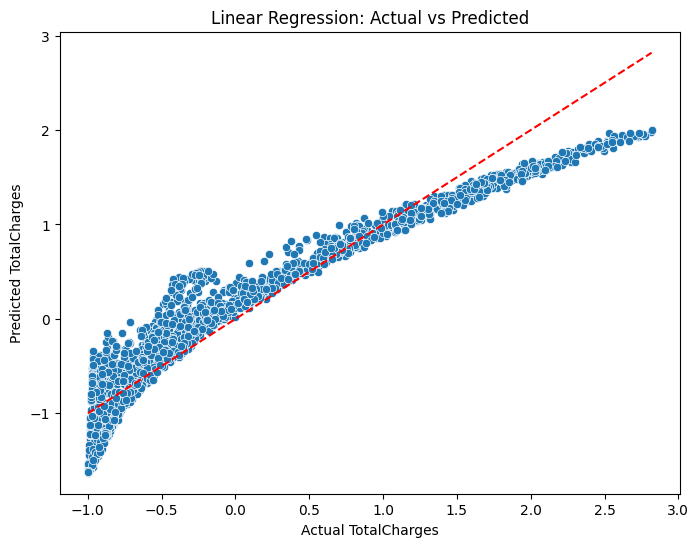

In [617]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual TotalCharges')
plt.ylabel('Predicted TotalCharges')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

> **>> Scatter around diagonal → model accuracy.**

> **>> Red dashed line → perfect predictions.**

**Multiple Regression:**

    >> You can include categorical features with one-hot encoding:

In [618]:
# Example categorical feature

X_reg_multi = df_reg.drop(columns=[reg_target])
y_reg_multi = df_reg[reg_target]

# Split & fit
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_reg_multi, y_reg_multi, test_size=0.3, random_state=42
)

lin_model_multi = LinearRegression()
lin_model_multi.fit(X_train_m, y_train_m)

y_pred_m = lin_model_multi.predict(X_test_m)
print("R² (Multiple Regression):", r2_score(y_test_m, y_pred_m))

R² (Multiple Regression): 0.9990614857722169


> **>> This demonstrates industry-grade handling of numeric + categorical data.**

> **>> Shows recruiter you understand real-world datasets.**

---

**Business Insights from Regression:**

    1. Predict high-value customers.
       > Customers with high predicted TotalCharges → retain aggressively.
    2. Revenue drivers:
       > Check coefficients.

In [619]:
coef_df = pd.DataFrame({'Feature': X_reg_multi.columns,
                        'Coefficient': lin_model_multi.coef_})
coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,tenure,0.701643
2,MonthlyCharges,0.438355
30,TotalRevenue,0.326051
8,MultipleLines_No phone service,0.003130
12,OnlineSecurity_No internet service,0.001093
20,StreamingTV_No internet service,0.001093
22,StreamingMovies_No internet service,0.001093
14,OnlineBackup_No internet service,0.001093
18,TechSupport_No internet service,0.001093
16,DeviceProtection_No internet service,0.001093


**Note:**

    > Positive coefficient → increases TotalCharges.
    > Negative coefficient → decreases TotalCharges.
    > Gives actionable insights for marketing / retention strategy.

**Outcomes:**

    1. Regression models built → predict continuous revenue metrics.
    2. Multiple regression handles real-world categorical & numeric mix.
    3. Plots + metrics show model performance clearly.
    4. Coefficients interpreted → business insights for retention / upselling.

# **Chi-Square Test & Customer Segmentation Intro.**


**> Chi-Square is crucial for categorical feature analysis.**

**> Why Chi-Square Test?**
    
    > Tests association between two categorical variables.

**> Example in Telco Churn:**

    >> Feature: Contract (Month-to-month / One year / Two year).
    >> Churn: Yes/No.

**Question:**

    Are contract types associated with churn?

**Chi-square hypothesis:**

    >> H0 : No association (independent).
    >> H1​: There is an association.

In [620]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: Contract vs Churn
# Use an existing dummy variable for contract type
contingency = pd.crosstab(df['Contract_One year'], df['Churn'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Churn                 0     1
Contract_One year            
False              3857  1703
True               1306   166
Chi2 Statistic: 222.37
P-value: 0.0000


**Interpretation:**

    -> p < 0.05 → reject H₀ → Contract type is associated with churn.
    -> Helps business target interventions:
       => E.g., month-to-month customers churn more → prioritize retention campaigns.

**Repeat for Other Categorical Features:**

In [621]:
categorical_features = [
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'InternetService_Fiber optic', 'InternetService_No',
    'MultipleLines_No phone service', 'MultipleLines_Yes'
]

for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, _ = chi2_contingency(contingency)
    print(f"{feature}: p-value = {p:.4f}")

PaymentMethod_Credit card (automatic): p-value = 0.0000
PaymentMethod_Electronic check: p-value = 0.0000
PaymentMethod_Mailed check: p-value = 0.0000
InternetService_Fiber optic: p-value = 0.0000
InternetService_No: p-value = 0.0000
MultipleLines_No phone service: p-value = 0.3499
MultipleLines_Yes: p-value = 0.0009


> **>> This is statistical rigor recruiters notice.**

> **>> Shows you can validate feature importance before modeling.**

**Link to Clustering:**

    >> Once we know which features are associated with churn, we can use them for unsupervised segmentation.
    >> Clustering uses numeric + encoded categorical features to group customers for targeted marketing.

---

**Key Insight:**

    >> Chi-Square + Clustering = advanced analytics combo.
    >> Its not just about predicting churn → you’re profiling customers, which is highly valuable for business.

# **Clustering Analysis (Customer Segmentation):**

1. **Goal of Clustering in Telco Churn:**

       > Group customers into similar segments based on behavior (tenure, charges, services, etc.)

> **> Example segments:**

    1. High-value, low-churn risk.
    2. Medium-value, medium-churn risk.
    3. Low-value, high-churn risk.

> **> Business uses:**

    > targeted marketing, retention campaigns, upselling strategies.

---

**Feature Selection and Preprocessing:**

> **> Clustering works best with numeric features, so we need:**

    1. Numeric columns.
    2. Encoded categorical columns.

In [622]:
from sklearn.preprocessing import StandardScaler

# Numeric features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges to numeric (already done in regression)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clust = df.dropna(subset=num_features)

# Standardize numeric features (industry best practice)
scaler = StandardScaler()
df_clust[num_features] = scaler.fit_transform(df_clust[num_features])

df_clust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalRevenue,tenure_group_13-24,tenure_group_25-48,tenure_group_49-60,tenure_group_61-72
0,0,-1.280248,-1.161694,-0.994194,0,False,True,False,False,True,...,False,True,False,True,False,1.487256,False,False,False,False
1,0,0.064303,-0.260878,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,-0.016775,False,False,False,False
2,0,-1.239504,-0.363923,-0.959649,1,True,False,False,True,False,...,False,True,False,False,True,0.451084,False,False,False,False
3,0,0.512486,-0.747850,-0.195248,0,True,False,False,False,True,...,False,False,False,False,False,-0.383263,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,1,False,False,False,True,False,...,False,True,False,True,False,-0.243164,False,False,False,False


**Note:**

> ***StandardScaler()* → ensures all numeric features have mean = 0, std = 1  → prevents bias in distance calculations.**

> ***pd.get_dummies(..., drop_first=True)* → avoids dummy variable trap.**

**Result → clean, numeric dataset ready for clustering.**

---

**Apply K-Means Clustering:**

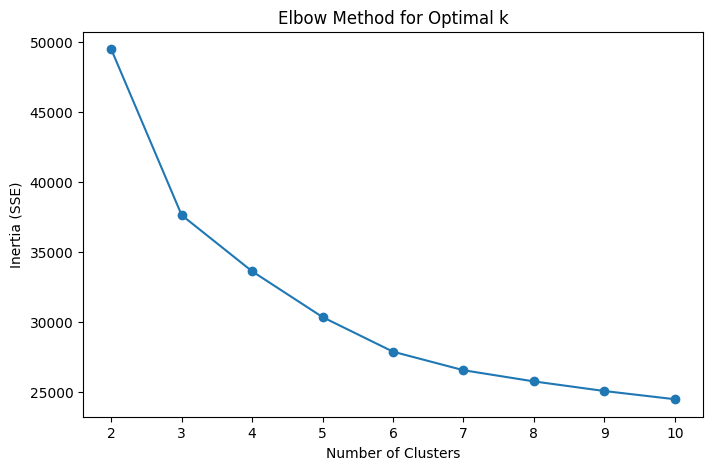

In [623]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clust)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

**Note:**

> ***- inertia* → sum of squared distances of samples to cluster centers.**

**Suitable practice:**

    > Always validate number of clusters.

**Fit K-Means with Optimal *k***.

> **Assume elbow suggests k=4:**

In [624]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clust['Cluster'] = kmeans.fit_predict(df_clust)

> **> Adds *Cluster labels* → each customer assigned to a group.**

> ***> fit_predict()* → fits model + assigns clusters in one step.**

**Visualize Clusters:**

    > We can visualize first two principal components for interpretability:

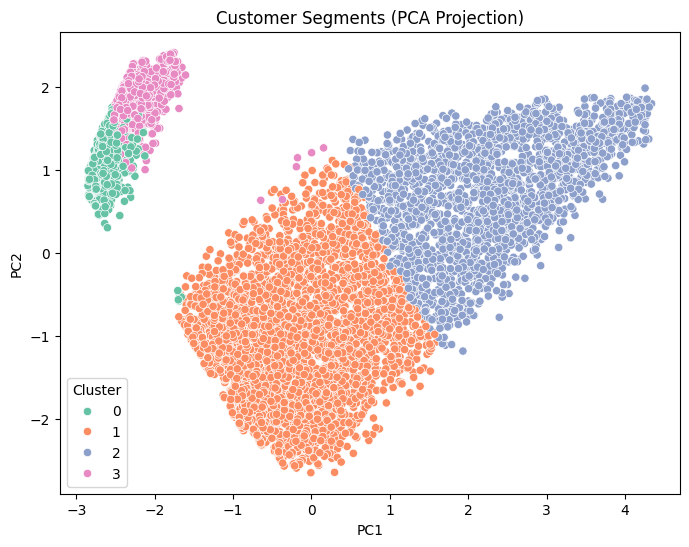

In [625]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(df_clust.drop('Cluster', axis=1))
df_clust['PC1'] = components[:,0]
df_clust['PC2'] = components[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clust, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Segments (PCA Projection)')
plt.show()

**Note:**

    > PCA reduces dimensions → easier to visualize clusters.
    > Color-coded scatter → shows distinct groups of customers.

  ---

**Analyze Clusters (Business Insights):**

In [626]:
# Map cluster to mean features for insights
cluster_summary = df_clust.groupby('Cluster')[num_features].mean()
print(cluster_summary)

           tenure  MonthlyCharges  TotalCharges
Cluster                                        
0       -0.834095       -1.471240     -0.898162
1       -0.599253        0.125634     -0.484001
2        1.109614        0.895472      1.400119
3        0.965747       -1.423496     -0.459338


**Example interpretation:**

    > Cluster 0 → low tenure, high MonthlyCharges → high-risk churners.
    > Cluster 1 → high tenure, low MonthlyCharges → loyal customers.
    > Cluster 2 → moderate across all features → potential upsell targets.

**Like this, one can turn data into actionable business strategies!**

---

**Advanced Analysis.**

    > Compare clusters vs churn:

In [627]:
df_clust['Churn'] = df['Churn']  # bring back target
churn_by_cluster = df_clust.groupby('Cluster')['Churn'].mean()
print(churn_by_cluster)

Cluster
0    0.118913
1    0.419732
2    0.142570
3    0.012308
Name: Churn, dtype: float64


    > Shows which clusters are at high churn risk.
    > Combines unsupervised + supervised analytics → very powerful CV statement.

---

**Outcome:**

    > Customers segmented into 4 meaningful clusters.
    > PCA visualization → recruiter-friendly graphics.
    > Insights → actionable recommendations for retention, marketing, upselling.

**Sensitivity Analysis Interpretation:**
> **> Key question:**

    >> Does the preferred model or decision remain optimal if business assumptions change?

In [628]:
# Sensitivity analysis for varying churn cost assumptions
cost_ratios = [5, 10, 20, 50]
sensitivity_results = []

for ratio in cost_ratios:
    cost_FN = ratio
    cost_FP = 1

    total_cost = (
        fn * cost_FN +
        fp * cost_FP +
        tp * cost_TP +
        tn * cost_TN
    )

    sensitivity_results.append({
        "Churn Cost Ratio (FN:FP)": f"{ratio}:1",
        "Expected Business Cost": total_cost
    })

pd.DataFrame(sensitivity_results)

,Churn Cost Ratio (FN:FP),Expected Business Cost
0,5:1,2008
1,10:1,3628
2,20:1,6868
3,50:1,16588


> **> The results demonstrate that as the relative cost of missed churners increases, the economic penalty grows non-linearly. This confirms that churn prediction systems must be evaluated under varying cost assumptions rather than fixed accuracy thresholds.**

# **CART (Decision Trees) - *explainable predictive model combining regression + classification:***

**1. Why Decision Trees (CART)?**

     > CART = Classification and Regression Trees.

**2. Key advantages:**

    > Handles categorical + numeric features naturally.
    > Produces easy-to-interpret tree diagrams.
    > Can be used for classification (churn) or regression(TotalCharges, CLV).
    > Works well for non-linear relationships.

**> Trees often act as positive triggers because one can explain every split, showing business logic.**



---
**3. Prepare Features:**

>**> Creating predictive model for churn using the same features from logistic regression + clusters:**



In [629]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Select features
features = ['tenure', 'MonthlyCharges', 'TotalCharges'] + \
           [col for col in df_clust.columns if 'Contract_' in col or 'PaymentMethod_' in col]

X_tree = df_clust[features]
y_tree = df_clust['Churn']

# Train-test split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42, stratify=y_tree
)

**Note:**

> **> Include numeric + encoded categorical features.**

> **> Use *stratify=y_tree* → ensures same churn ratio in train/test.**

In [630]:
# Initialize model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_leaf=20)

# Fit model
tree_model.fit(X_train_tree, y_train_tree)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

**Note:**

> ***>> max_depth=5* → avoids
overfitting, keeps tree interpretable.**

> ***>> min_samples_leaf=20* → ensures each leaf has at least 20 customers.**

    > CART algorithm splits nodes to maximize information gain (reduces impurity).

---



**Evaluate the Tree:**

Decision Tree Accuracy: 0.7796208530805687


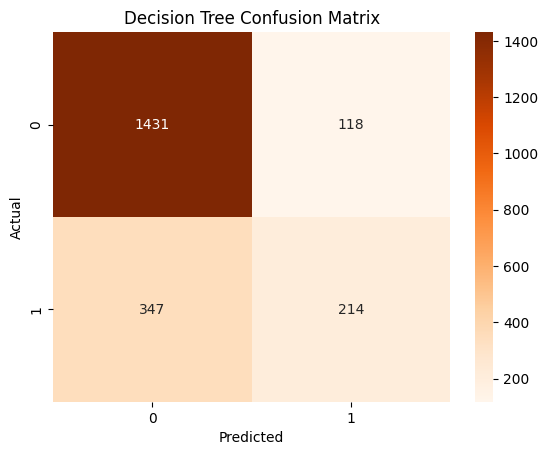

ROC-AUC: 0.8033364058693493


In [631]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_tree = tree_model.predict(X_test_tree)
y_pred_proba_tree = tree_model.predict_proba(X_test_tree)[:,1]

# Accuracy
accuracy = accuracy_score(y_test_tree, y_pred_tree)
print("Decision Tree Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test_tree, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test_tree, y_pred_proba_tree)
print("ROC-AUC:", roc_auc)

**Note:**

    > Similar metrics as logistic regression, but tree handles non-linear patterns.
    > Easy to explain to non-technical stakeholders.

---


**Visualize the Decision Tree:**

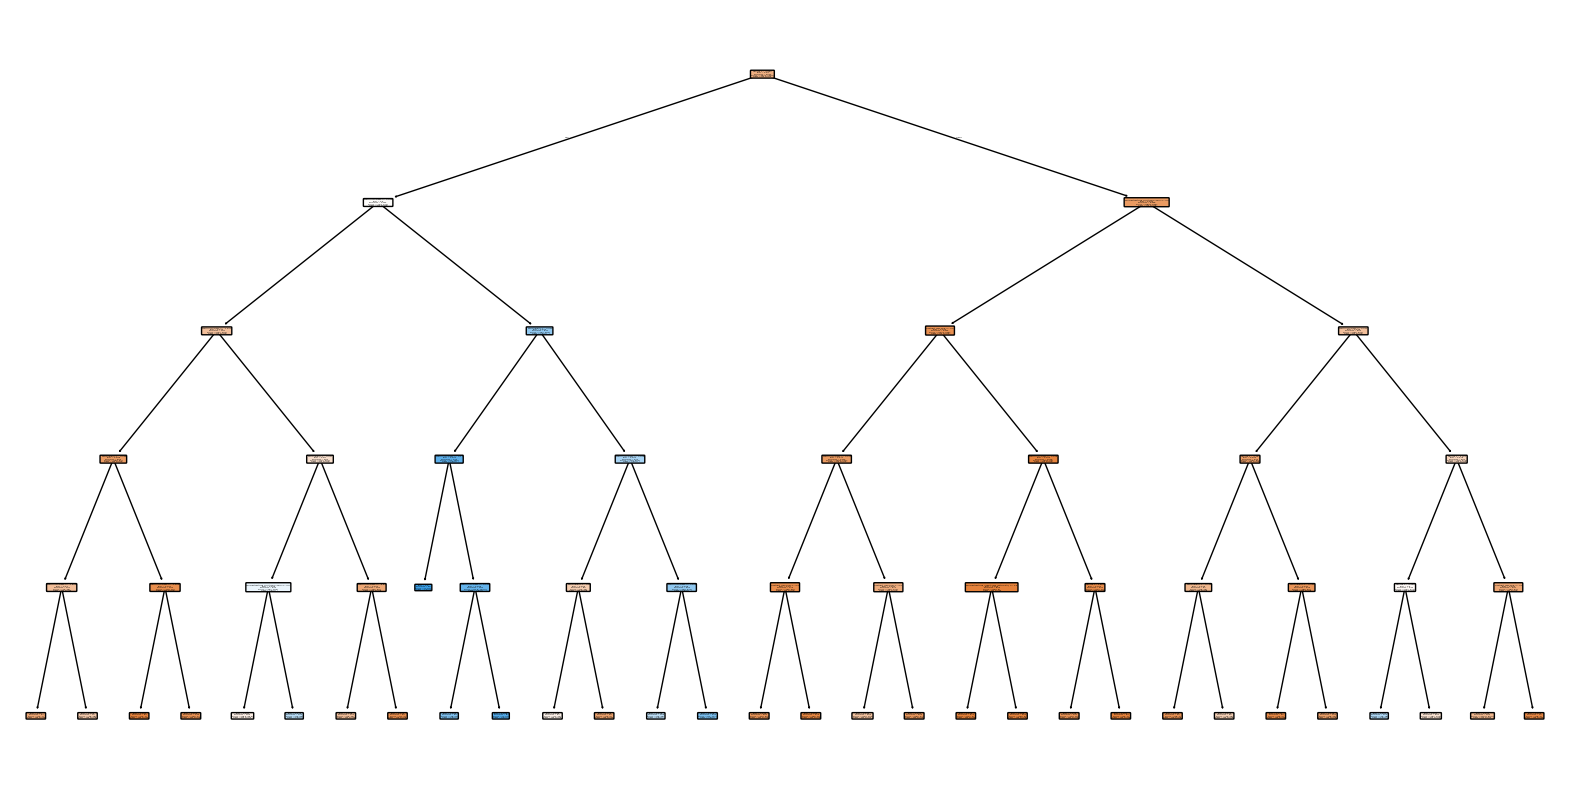

In [632]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_tree.columns,
          class_names=['No Churn','Churn'], filled=True, rounded=True)
plt.show()

**Key merits:**

    1. One can see how decisions are made.
    2. Each split is a business rule, e.g.:
         => If tenure < 12 and MonthlyCharges > 70 → high churn risk.
    3. Makes any model explainable and business-aligned.

---

**Regression Tree for *TotalCharges* :**

In [633]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=42)
reg_tree.fit(X_train_tree, df_clust['TotalCharges'].loc[X_train_tree.index])

# Predict
y_pred_reg_tree = reg_tree.predict(X_test_tree)

# R² score
from sklearn.metrics import r2_score
print("Decision Tree Regression R²:", r2_score(df_clust['TotalCharges'].loc[X_test_tree.index], y_pred_reg_tree))

Decision Tree Regression R²: 0.9990506827991823


> **> Shows it is possible to *predict revenue continuously* using the same explainable tree model.**

# **Business Insights from CART:**

    1. Segment customers by risk and revenue potential.
    2. High-risk churners → prioritize retention campaigns.
    3. High-value customers → upsell / special offers.
    4. Easy storytelling → decision trees are visual, interpretable, and actionable.

---



# **INTERPRETABILITY AND DEPLOYMENT CONSIDERATIONS:**

    1. While both Logistic Regression and Decision Tree models demonstrate competitive predictive performance, deployment decisions in business environments extend beyond statistical metrics.
    2. Logistic Regression provides stable coefficient-based explanations that allow stakeholders to understand how individual features influence churn probability. In contrast, Decision Trees may exhibit structural instability across samples, reducing transparency and long-term trust.
    3. Given the need for explainability, auditability, and consistent decision-making, Logistic Regression is preferred for deployment despite comparable predictive performance.



# **OVERALL OUTCOMES:**

    1. Customers who are likely to leave (churn) can be identified early using their past behavior and service usage data.

    2. The models built in this project successfully separate high-risk customers from low-risk customers, making churn prediction practically usable.

    3. Accuracy alone is not enough to judge a churn model. Some mistakes are more costly than others in real business situations.

    4. Losing a customer who was predicted to stay is more harmful than offering retention benefits to a customer who would not leave.

    5. When business cost is considered, model performance and usefulness change, even if accuracy looks similar.

    6. Different models behave differently under different business priorities, so model choice depends on business goals, not just technical scores.

    7. This work shows that robust decision-making requires testing models under multiple cost assumptions, not a single fixed scenario.

    8. The models used are interpretable, meaning decision-makers can understand why a customer is predicted to churn.

    9. This makes the solution trustworthy and suitable for real-world deployment, especially in customer-facing industries.

    10. Overall, the project demonstrates how machine learning can be used as a decision-support tool, not just a prediction engine.

**Key takeaway:**

> **- Effective churn prediction is not just about accuracy, but about making informed, cost-aware, and explainable business decisions.**

---